# Part I: The binomial tree: Option Valuation

In [4]:
%matplotlib inline

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import norm

In [6]:
# Define functions
def buildTree(S,sigma,T,N):
    dt = T/N   
    matrix = np.zeros((N+1, N+1))
    
    u = math.exp(sigma*math.sqrt(dt)) 
    d = math.exp(-sigma*math.sqrt(dt)) # Use volatility to approximate
    
    # Iterate over the lower triangle
    for i in np.arange(N+1): # iterate over rows
        for j in np.arange(i+1): # iterate over columns
            # Hint: express each cell as a combination of up and down moves
            matrix[i,j] = S * d**(i-j) * u**j
            
    return matrix

def valueOptionMatrix(tree,T,r,K,sigma):
    dt = T/N
    
    u = math.exp(sigma*math.sqrt(dt)) 
    d = math.exp(-sigma*math.sqrt(dt))
    
    p = (math.exp(r*dt)-d)/(u-d)
    
    columns = tree.shape[1]
    rows = tree.shape[0]
    
    # Walk backward, we start in last row of the matrix
    
    # Add the payoff function in the last row
    for c in np.arange(columns):
        S = tree[rows-1, c] # value in the matrix
        tree[rows-1, c] = max(0,S-K)
        
    # For all other rows, we need to combine from previous rows
    # We walk backwards, from the last row to the first row
    for i in np.arange(rows-1)[::-1]:
        for j in np.arange(i+1):
            down = tree[i+1,j]
            up = tree[i+1,j+1]
            tree[i,j] = math.exp(-r*dt) * (p*up + (1-p)*down)
    return tree

In [15]:
# Execution
sigma = 0.2 # volality
S0 = 100 # current price of the stock
T = 1 # maturity
N = 50 # number of simulation steps

K = 99 # strike price
r = 0.06 # one year interest rate

tree = buildTree(S0,sigma,T,N) # Store the stock price
option_value = valueOptionMatrix(tree,T,r,K,sigma)

print(option_value[0,0])

11.546434850755071


In [ ]:
# Play around with different ranges of N and step sizes
N = np.arange(1,300)

# Calculate the option price for the correct parameters
optionPriceAnalytical = 0 # TODO

# Calculate option price for each n in N
for n in N:
    treeN = buildTree(...) # TODO
    priceApproximatedly = valueOptionMatrix(...) # TODO
    

# use matplotlib to plot the analytical value and the approximated value for each N

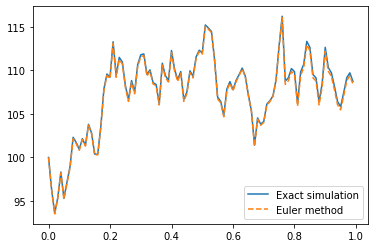

In [57]:
# Ito process: the stock price (underlying asset)
M = 100
T = 1
delta_t = T/M
t = np.arange(0,T, delta_t)
sigma = 0.2 # volatility
r = 0.06 # interest rate
K = 99 # strike price

# To simulate the evolution of stock price, initiate the array to store it
S_exact = np.zeros(M)
S_exact[0] = 100 # stock price today
S_euler = np.zeros(M)
S_euler[0] = 100

Z = np.zeros(M)

for m in range(1,M):
    Z[m] = random.normal(0,1)
    # Exact simulation GBM
    S_exact[m] = S_exact[m-1] * math.exp((r-1/2*sigma**2)*delta_t + sigma*math.sqrt(delta_t)*Z[m])
    # Approximate simulation GBM with Euler method
    S_euler[m] = S_euler[m-1] + r*S_euler[m-1]*delta_t + sigma*S_euler[m-1]*math.sqrt(delta_t)*Z[m]
    

plt.plot(t,S_exact, label = 'Exact simulation')
plt.plot(t,S_euler, '--', label = 'Euler method')
plt.legend()

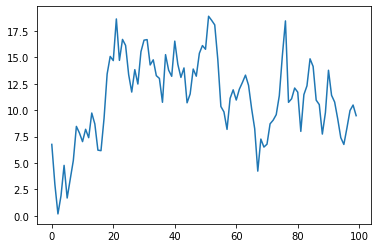

In [60]:
# the Black-Scholes formula for a call option
# S(t) already simulated in the previous part
V = np.zeros(len(t))
K = 99

for i in range(len(t)):
    tau = T - t[i]
    S = np.copy(S_euler)
    
    d1 = (math.log(S[i]/K) + (r+1/2*sigma**2) + tau)/(sigma*math.sqrt(tau))
    d2 = d1 - sigma*math.sqrt(tau)
    
    V[i] = S[i]*norm.cdf(d1) - math.exp(-r*tau)*K*norm.cdf(d2)

plt.plot(V)